# Praktyczny Machine Learning w Pythonie
<br>
<img src="figures/L1/boyfriend.png">

## Co to jest Machine Learning? 

Machine learning zajmuje się tworzeniem modeli na podstawie danych, które potrafią rozwiązywać dany problem, na przykład klasyfikować cyfry lub rozpoznawać czy dany e-mail jest spamem.  Stworzony model (na podstawie zbioru danych, np. e-maili sprzed paru lat) potem jest testowany na nowych przykładach (nowych e-mailach).

Praktyczne systemy machine learningu działają wszędzie. Przykłady to Amazon, Google Translate, Filmweb, rozpoznawanie głosu w Androidzie itp.

Jak wspominałem celem warsztatów nie jest nauka machine learningu samego w sobie, 
tylko raczej wykorzystanie go do rozwiązania konkretnego problemu. Pod koniec zamieścimy dobre źródła do samodzielnej nauki.

<img src="figures/L1/ml-chart-simple.jpg">


** Skupmy się na problemie klasyfikacji. Chcemy nauczyć algorytm który przydzieli każdemu przykładowi (obrazek, zdanie, itp.) jakąś wartość na podstawie jakiś danych. ** Przykładowo:

* Jaka to cyfra:
    * dane: obrazek cyfry
    * możliwe klasy: 0,1,2,3,4,5,6,7,8,9
* Czy na obrazku znajduje się motor? (możliwe klasy/wartości: 0/1)
* Czy jutro będzie padało (możliwe klasy: 0/1).
    * dane: wiatr, temperatura i opady sprzed 10 dni

<img src="figures/L1/2d_classification.jpg">

## Reprezentacja danych - kwiatek w komputerze?

Iris to znany zbiór danych, w których przykładami są różne gatunki irysa (kwiatek!), którym staramy się przyporządkować gatunek (jeden z trzech).

Musimy jakoś ten kwiatek zareprezentować w komputerze. W tym celu zwykle opisujemy każdy przykład wektorem liczb (numpy!), np. możemy zmierzyć wielkość płatków.

Pakiet scikit-learn (o którym będzie więcej!) ma wbudowany zbiór Iris.

Każdy kwiatek jest opisany jako wektor 4 liczb opisujących wymiary kwiatka

1. Długość płatka w cm
2. Szerokosć płatka w cm
3. Długość działki kielicha (??) w cm
4. Szerokość działki kielicha (??) w cm

Staramy się przewidzieć gatunek, czyli jeden z :

1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# Załadowany obiekt jest słownikiem
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [3]:
iris['data']

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [5]:
# Nawet ma ładny opis ocb.
_ = iris["DESCR"] 

## Zbiory danych to macierze numpy !

Macierz numpy przechowuje swój wymiar w zmiennej *shape*.

In [20]:
n_samples, n_features = iris.data.shape
print "Macierz ma wymiar: ", iris.data.shape

 Macierz ma wymiar:  (150, 4)


In [7]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [21]:
print "Ilość przykładów: ", n_samples
print "Każdy przykład ma ", n_features, " cechy"
print "Pierwszy przykład: ", iris.data[0]

Ilość przykładów:  150
Każdy przykład ma  4  cechy
Pierwszy przykład:  [ 5.1  3.5  1.4  0.2]


### Cwiczenie 3 (1 pkt): 
    a) Jaka jest średnia długość płatka w zbiorze danych? (pierwsza cecha przykładu, podpowiedź: macierz przykładów jest w iris.data). 
    b) Narysuj histogram długości płatka (plt.hist)

5.1
średnia długość płatka w zbiorze danych to: 5.84333333333


(array([  9.,  23.,  14.,  27.,  16.,  26.,  18.,   6.,   5.,   6.]),
 array([ 4.3 ,  4.66,  5.02,  5.38,  5.74,  6.1 ,  6.46,  6.82,  7.18,
         7.54,  7.9 ]),
 <a list of 10 Patch objects>)

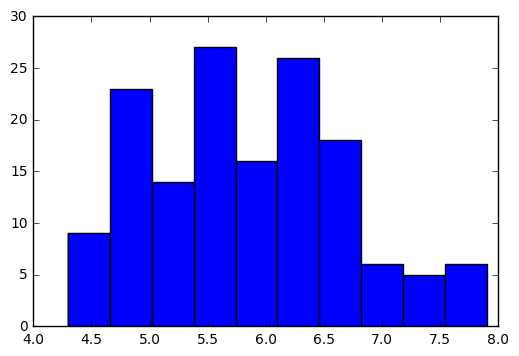

In [4]:
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()
n_samples, n_features = iris.data.shape
print iris.data[0][0]
suma = 0
for i in range(n_samples):
    suma = suma + iris.data[i][0]
srednia = suma/n_samples
print "średnia długość płatka w zbiorze danych to:", srednia
iris_samples = [];
for i in range(n_samples):
    iris_samples.append(iris.data[i][0])

plt.hist(iris_samples,bins = 10)

## Liniowa separowalnosc

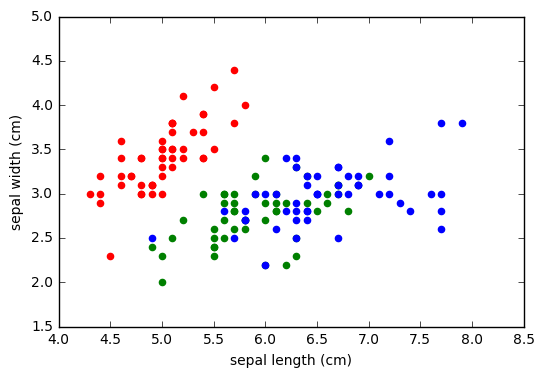

In [62]:
plt.scatter(iris.data[iris['target']==0, 0], iris.data[iris['target']==0, 1], color='r')
plt.scatter(iris.data[iris['target']==1, 0], iris.data[iris['target']==1, 1], color='g')
plt.scatter(iris.data[iris['target']==2, 0], iris.data[iris['target']==2, 1], color='b')
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])

### Ćwiczenie 5 (1 pkt): 
    a) We wcześniejszym przykładzie narysowałem wykres na podstawie 1 i 2 cechy (2 z 4 cech). Proszę sprawdzić czy jakaś inna kombinacja cech poprawia separowalność przykładów (łatwiej je oddzielić kreską)

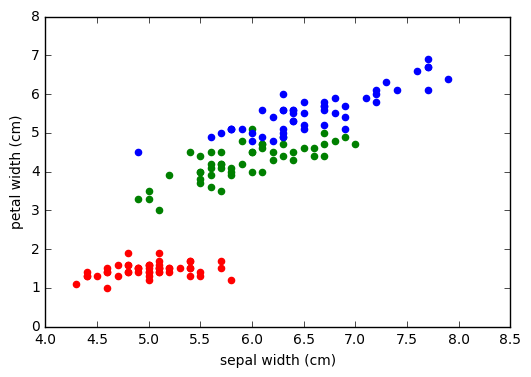

In [56]:
plt.scatter(iris.data[iris['target']==0, 0], iris.data[iris['target']==0, 2], color='r')
plt.scatter(iris.data[iris['target']==1, 0], iris.data[iris['target']==1, 2], color='g')
plt.scatter(iris.data[iris['target']==2, 0], iris.data[iris['target']==2, 2], color='b')
plt.xlabel(iris['feature_names'][1])
plt.ylabel(iris['feature_names'][3])

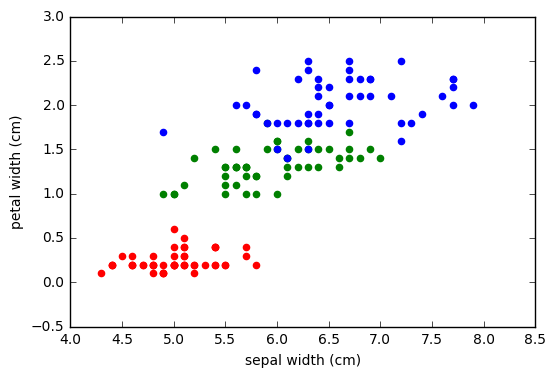

In [57]:
plt.scatter(iris.data[iris['target']==0, 0], iris.data[iris['target']==0, 3], color='r')
plt.scatter(iris.data[iris['target']==1, 0], iris.data[iris['target']==1, 3], color='g')
plt.scatter(iris.data[iris['target']==2, 0], iris.data[iris['target']==2, 3], color='b')
plt.xlabel(iris['feature_names'][1])
plt.ylabel(iris['feature_names'][3])

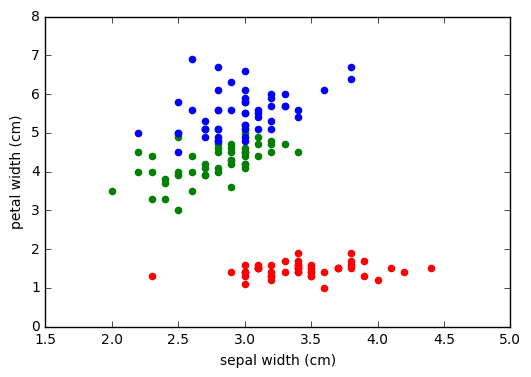

In [58]:
plt.scatter(iris.data[iris['target']==0, 1], iris.data[iris['target']==0, 2], color='r')
plt.scatter(iris.data[iris['target']==1, 1], iris.data[iris['target']==1, 2], color='g')
plt.scatter(iris.data[iris['target']==2, 1], iris.data[iris['target']==2, 2], color='b')
plt.xlabel(iris['feature_names'][1])
plt.ylabel(iris['feature_names'][3])

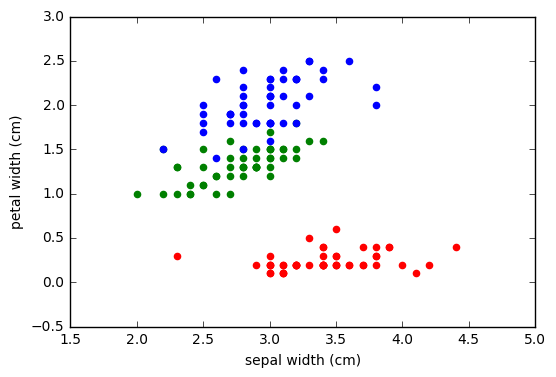

In [59]:
plt.scatter(iris.data[iris['target']==0, 1], iris.data[iris['target']==0, 3], color='r')
plt.scatter(iris.data[iris['target']==1, 1], iris.data[iris['target']==1, 3], color='g')
plt.scatter(iris.data[iris['target']==2, 1], iris.data[iris['target']==2, 3], color='b')
plt.xlabel(iris['feature_names'][1])
plt.ylabel(iris['feature_names'][3])

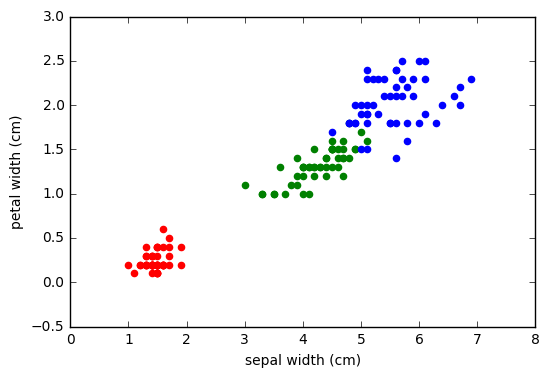

In [61]:
plt.scatter(iris.data[iris['target']==0, 2], iris.data[iris['target']==0, 3], color='r')
plt.scatter(iris.data[iris['target']==1, 2], iris.data[iris['target']==1, 3], color='g')
plt.scatter(iris.data[iris['target']==2, 2], iris.data[iris['target']==2, 3], color='b')
plt.xlabel(iris['feature_names'][1])
plt.ylabel(iris['feature_names'][3])

In [ ]:
# Powyżej rozpatrzone 6 możliwych kombinacji 2 z 4 cech.
# Widać, że 1 wykres (1 i 2 cecha) nie daje dobrej separowalność przykładów.
# Reszta wykresów daje podobną separowalność, lepszą niż wykres 1.